In [1]:
import cv2
import joblib
import os
from matplotlib import pyplot as plt

In [2]:
from src.features import *

def preprocess(image):
    image = cv2.resize(image, (32, 32))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    feature = extract_color_histogram(image)
    return feature


def predict(image, model):
    features = preprocess(image)
    prediction = model.predict([features])
    return "Not smoking" if prediction[0] == 0 else "Smoking"

In [ ]:
model_name = "svm.pkl"

model_path = os.path.join("src/checkpoint", model_name)
model = joblib.load(model_path)

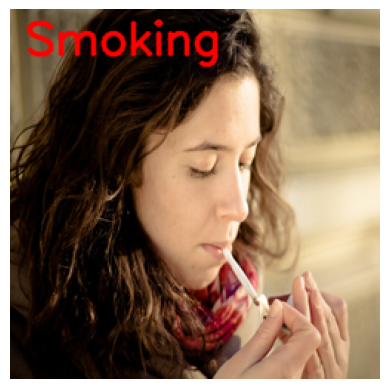

In [15]:
test_path = "data/Testing/images"
image_path = os.path.join(test_path,"smoking_0182.jpg")

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

label = predict(image, model)
# Hiển thị ảnh sử dụng matplotlib

cv2.putText(
    image,  # Ảnh
    label,  # Nội dung nhãn
    (10, 30),  # Tọa độ (x, y)
    cv2.FONT_HERSHEY_SIMPLEX,  # Font chữ
    1,  # Kích thước chữ
    (255, 0, 0),  # Màu sắc (BGR: Xanh dương)
    2,  # Độ dày nét chữ
    cv2.LINE_AA  # Kiểu khử răng cưa
)

plt.imshow(image)
plt.axis('off')  # Tắt hiển thị trục
plt.show()
